In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, Concatenate
from tensorflow.keras.datasets import fashion_mnist, mnist
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.backend import clear_session
from tensorflow.keras.utils import plot_model
from sklearn.utils import resample

In [2]:
(X_train_org, y_train_org), (X_test_org, y_test_org) = fashion_mnist.load_data()

X_train_org = X_train_org.reshape(-1, 28, 28, 1)
X_test_org = X_test_org.reshape(-1, 28, 28, 1)

X_train_org = X_train_org.astype('float32')
X_test_org = X_test_org.astype('float32')
X_train_org /= 255
X_test_org /= 255

X_train_org, y_train_org = resample(X_train_org, y_train_org, random_state=0)
X_test_org, y_test_org = resample(X_test_org, y_test_org, random_state=0)

In [3]:
def get_train_test_data(train_samples, test_samples):
    X_train = X_train_org[:train_samples]
    y_train = y_train_org[:train_samples]
    X_test = X_test_org[:test_samples]
    y_test = y_test_org[:test_samples]
    return X_train, y_train, X_test, y_test

In [4]:
def train_model(model, train_samples, test_samples, epochs=10, optimizer='adam', n=1):   
    X_train, y_train, X_test, y_test = get_train_test_data(train_samples, test_samples)  
    
    if n > 1:
        X_train = [X_train] * n
        X_test = [X_test] * n
    
    clear_session()
    np.random.seed(0x859)
    tf.random.set_seed(0x859)
    
    model.summary()    
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=True)

In [5]:
model_sgd_input = Input(shape=(28, 28, 1))
model_sgd = Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28, 28, 1))(model_sgd_input)
model_sgd = MaxPooling2D((2, 2))(model_sgd)
model_sgd = Conv2D(16, (3,3), padding='same', activation='relu')(model_sgd)
model_sgd = MaxPooling2D((2, 2))(model_sgd)
model_sgd = Flatten()(model_sgd)
model_sgd = Dense(64, activation='relu')(model_sgd)
model_sgd = Dense(10, activation='softmax')(model_sgd)
model_sgd = Model(inputs=model_sgd_input, outputs=model_sgd, name='model_sgd')

In [6]:
sgd = SGD(learning_rate=0.01, momentum=0.9, nesterov=True, name="SGD")

train_model(model_sgd, 4000, 1000, 10, optimizer=sgd)

Model: "model_sgd"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 16)        4624      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                50

In [7]:
model_adam_input = Input(shape=(28, 28, 1))
model_adam = Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28, 28, 1))(model_adam_input)
model_adam = MaxPooling2D((2, 2))(model_adam)
model_adam = Conv2D(16, (3,3), padding='same', activation='relu')(model_adam)
model_adam = MaxPooling2D((2, 2))(model_adam)
model_adam = Flatten()(model_adam)
model_adam = Dense(64, activation='relu')(model_adam)
model_adam = Dense(10, activation='softmax')(model_adam)
model_adam = Model(inputs=model_adam_input, outputs=model_adam, name='model_adam')

In [8]:
train_model(model_adam, 4000, 1000, 10, 'adam')

Model: "model_adam"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 16)        4624      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                5

In [9]:
for layer in model_sgd._layers:
    layer._name = layer.name + '_sgd'
    
for layer in model_adam._layers:
    layer._name = layer.name + '_adam'

In [10]:
model_sgd.trainable = False
model_sgd.summary()

Model: "model_sgd"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1_sgd (InputLayer)     [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_sgd (Conv2D)          (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_sgd (MaxPoolin (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1_sgd (Conv2D)        (None, 14, 14, 16)        4624      
_________________________________________________________________
max_pooling2d_1_sgd (MaxPool (None, 7, 7, 16)          0         
_________________________________________________________________
flatten_sgd (Flatten)        (None, 784)               0         
_________________________________________________________________
dense_sgd (Dense)            (None, 64)                50

In [11]:
model_adam.trainable = False
model_adam.summary()

Model: "model_adam"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1_adam (InputLayer)    [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_adam (Conv2D)         (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_adam (MaxPooli (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1_adam (Conv2D)       (None, 14, 14, 16)        4624      
_________________________________________________________________
max_pooling2d_1_adam (MaxPoo (None, 7, 7, 16)          0         
_________________________________________________________________
flatten_adam (Flatten)       (None, 784)               0         
_________________________________________________________________
dense_adam (Dense)           (None, 64)                5

In [12]:
model_ensemble = Concatenate()([model_sgd.layers[-1].output, model_adam.layers[-1].output])
model_ensemble = Dense(10, activation='softmax')(model_ensemble)  # or 'sigmoid'
model_ensemble = Model(inputs=[model_sgd.input, model_adam.input], outputs=model_ensemble)
model_ensemble.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1_sgd (InputLayer)        [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
input_1_adam (InputLayer)       [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_sgd (Conv2D)             (None, 28, 28, 32)   320         input_1_sgd[0][0]                
__________________________________________________________________________________________________
conv2d_adam (Conv2D)            (None, 28, 28, 32)   320         input_1_adam[0][0]               
______________________________________________________________________________________________

In [13]:
# X_train, y_train, X_test, y_test = get_train_test_data(4000, 1000)    
    
# clear_session()
# np.random.seed(0x859)
# tf.random.set_seed(0x859)
    
# model.summary()    
# model.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

# epochs = 10

# model.fit([X_train, X_train], y_train, epochs=epochs, validation_data=([X_test, X_test], y_test), verbose=True)

In [14]:
train_model(model_ensemble, 4000, 1000, 10, n=2, optimizer='adam')

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1_sgd (InputLayer)        [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
input_1_adam (InputLayer)       [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_sgd (Conv2D)             (None, 28, 28, 32)   320         input_1_sgd[0][0]                
__________________________________________________________________________________________________
conv2d_adam (Conv2D)            (None, 28, 28, 32)   320         input_1_adam[0][0]               
______________________________________________________________________________________________

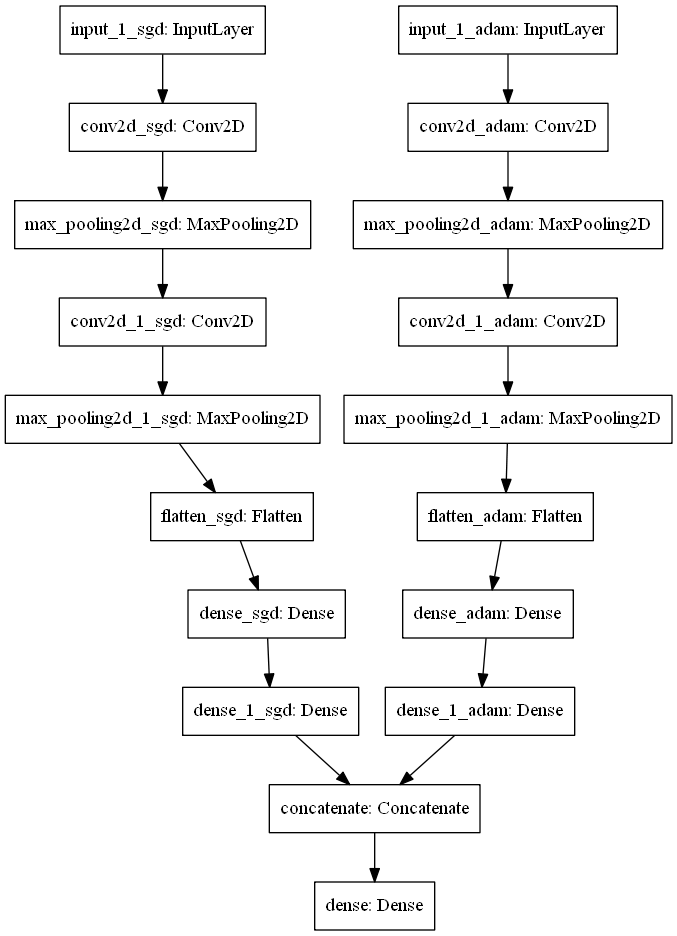

In [15]:
plot_model(model_ensemble)